In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('weatherHistory.csv')

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
# Dropping the duplicates
df = df.drop_duplicates()
df.shape

(96429, 12)

In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Formatted Date' : 'FD', 
                        'Visibility (km)' : 'Visibility',
                        'Precip Type' : 'Precip_Type',
                        'Temperature (C)' : 'Temperature',
                        'Apparent Temperature (C)' : 'Apparent_Temp',
                        'Wind Speed (km/h)' : 'Wind_Speed',
                        'Pressure (millibars)' : 'Pressure'})

In [ ]:
# Extracting the date
just_date = lambda x:str(x[:10])
df['Date'] = df.FD.apply(just_date)
df

,FD,Summary,Precip_Type,Temperature,Apparent_Temp,Humidity,Wind_Speed,Wind Bearing (degrees),Visibility,Loud Cover,Pressure,Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09


In [ ]:
# Extracting hour
just_hour = lambda x:str(x[11:13])
df['Hour'] = df.FD.apply(just_hour)
df

,FD,Summary,Precip_Type,Temperature,Apparent_Temp,Humidity,Wind_Speed,Wind Bearing (degrees),Visibility,Loud Cover,Pressure,Daily Summary,Date,Hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,02
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,03
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,19
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,20
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,21
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09,22


In [ ]:
# Extracting time zone 
tz = lambda x:str(x[-6:-2])
df['Time_zone'] = df.FD.apply(tz)
df

,FD,Summary,Precip_Type,Temperature,Apparent_Temp,Humidity,Wind_Speed,Wind Bearing (degrees),Visibility,Loud Cover,Pressure,Daily Summary,Date,Hour,Time_zone
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,00,+02
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,01,+02
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,02,+02
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,03,+02
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,04,+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,19,+02
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,20,+02
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,21,+02
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09,22,+02


In [ ]:
# Dropping Loud Cover column, as it only contains 0.0 values
df = df.drop(['Loud Cover'], axis=1) 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce', dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96429 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FD                      96429 non-null  object        
 1   Summary                 96429 non-null  object        
 2   Precip_Type             95912 non-null  object        
 3   Temperature             96429 non-null  float64       
 4   Apparent_Temp           96429 non-null  float64       
 5   Humidity                96429 non-null  float64       
 6   Wind_Speed              96429 non-null  float64       
 7   Wind Bearing (degrees)  96429 non-null  float64       
 8   Visibility              96429 non-null  float64       
 9   Pressure                96429 non-null  float64       
 10  Daily Summary           96429 non-null  object        
 11  Date                    96429 non-null  datetime64[ns]
 12  Hour                    96429 non-null  object

<Axes: >

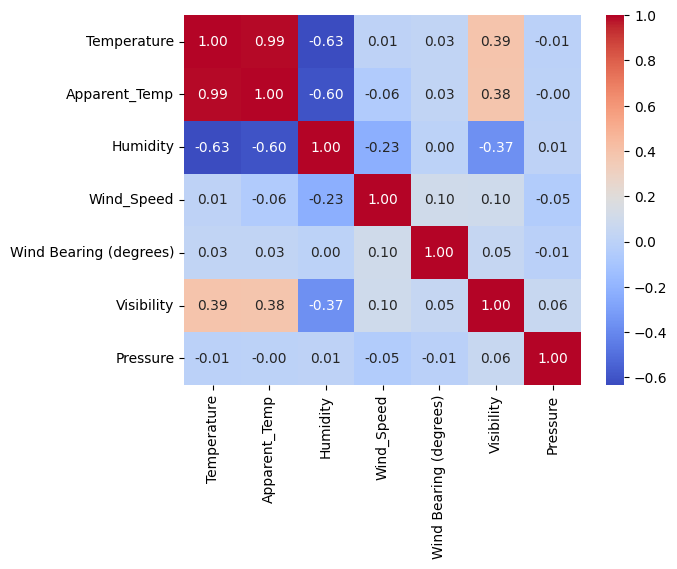

In [ ]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

In [ ]:
# Deleting wrong pressure measurements
df = df[df['Pressure'] > 900]

In [ ]:
# Deleting wrong humidity measurements
df = df[df['Humidity'] != 0]

In [ ]:
df = df.dropna() 

In [ ]:
def encoding(precip_type):
  if precip_type == 'rain':
    return 0
  else:
    return 1

In [ ]:
df['Precip_Type'] = df['Precip_Type'].apply(encoding)
df

<ipython-input-21-7011227a10f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precip_Type'] = df['Precip_Type'].apply(encoding)


,FD,Summary,Precip_Type,Temperature,Apparent_Temp,Humidity,Wind_Speed,Wind Bearing (degrees),Visibility,Pressure,Daily Summary,Date,Hour,Time_zone
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006-04-01,00,+02
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006-04-01,01,+02
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01,02,+02
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01,03,+02
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01,04,+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.,2016-09-09,19,+02
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.,2016-09-09,20,+02
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.,2016-09-09,21,+02
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.,2016-09-09,22,+02


In [ ]:
df = df.drop(['Summary', 'Daily Summary'], axis=1) 

In [ ]:
df['Hour'] = pd.to_numeric(df['Hour'])

In [ ]:
df = df.drop(['FD'], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

## Przechodzimy do modelowania drzewka




In [ ]:
df.columns

Index(['Precip_Type', 'Temperature', 'Apparent_Temp', 'Humidity', 'Wind_Speed',
       'Wind Bearing (degrees)', 'Visibility', 'Pressure', 'Date', 'Hour',
       'Time_zone'],
      dtype='object')

<Axes: >

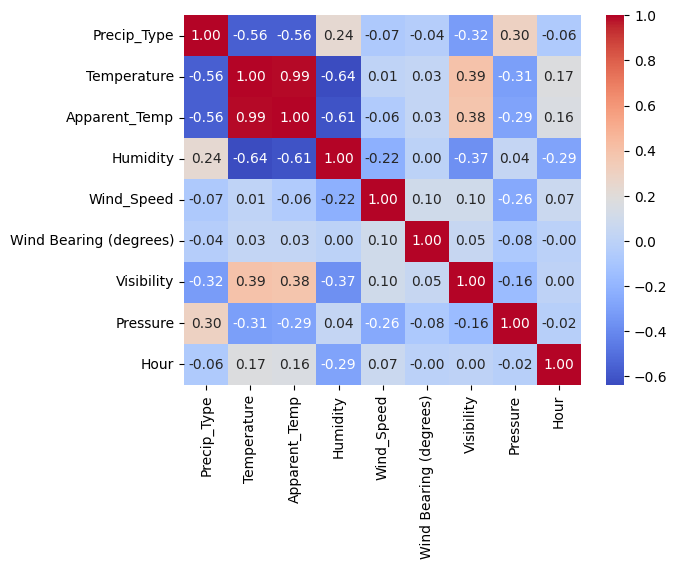

In [ ]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')

In [ ]:
X=df[['Temperature', 'Wind_Speed', 'Pressure', 'Precip_Type', 'Hour']]
y=df['Humidity']

In [ ]:
# # Podział na dane treningowe i testowe.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [ ]:
print(X.shape,y.shape)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(94602, 5) (94602,)
(75681, 5) (75681,)
(18921, 5) (18921,)


In [ ]:
from sklearn.model_selection import KFold

cv=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in cv.split(X,y):
  X_train,y_train=X.iloc[train],y.iloc[train]
  X_test,y_test=X.iloc[test],y.iloc[test]
  print(X_train.shape,X_test.shape)

(75681, 5) (18921, 5)
(75681, 5) (18921, 5)
(75682, 5) (18920, 5)
(75682, 5) (18920, 5)
(75682, 5) (18920, 5)


In [ ]:
model=DecisionTreeRegressor()
res_GSLOO=GridSearchCV(model,
                       param_grid={'max_depth':range(1,10),
                                   'min_samples_split':range(10,60,10)},
                       cv=KFold(),
                       scoring='neg_mean_absolute_error')
res_GSLOO.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(res_GSLOO.best_params_)

{'max_depth': 9, 'min_samples_split': 50}


In [ ]:
#przetrenuj model z wybranymi hiperparametrami
tree_model=tree.DecisionTreeRegressor(random_state=111,min_samples_split=50,max_depth=9)
tree_model.fit(X_train,y_train)
tree_pred=tree_model.predict(X_test)
mae(y_test,tree_pred)

0.09050593117922724

In [ ]:
mse(y_test,tree_pred)

0.013617431160782774

In [ ]:
r2_score(y_test,tree_pred)

0.6406578331819064

In [ ]:
feat_importance=tree_model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance

,0,1
0,Temperature,0.018814
4,Hour,0.004244
1,Wind_Speed,0.001278
2,Pressure,0.001227
3,Precip_Type,0.000000


AttributeError: ignored

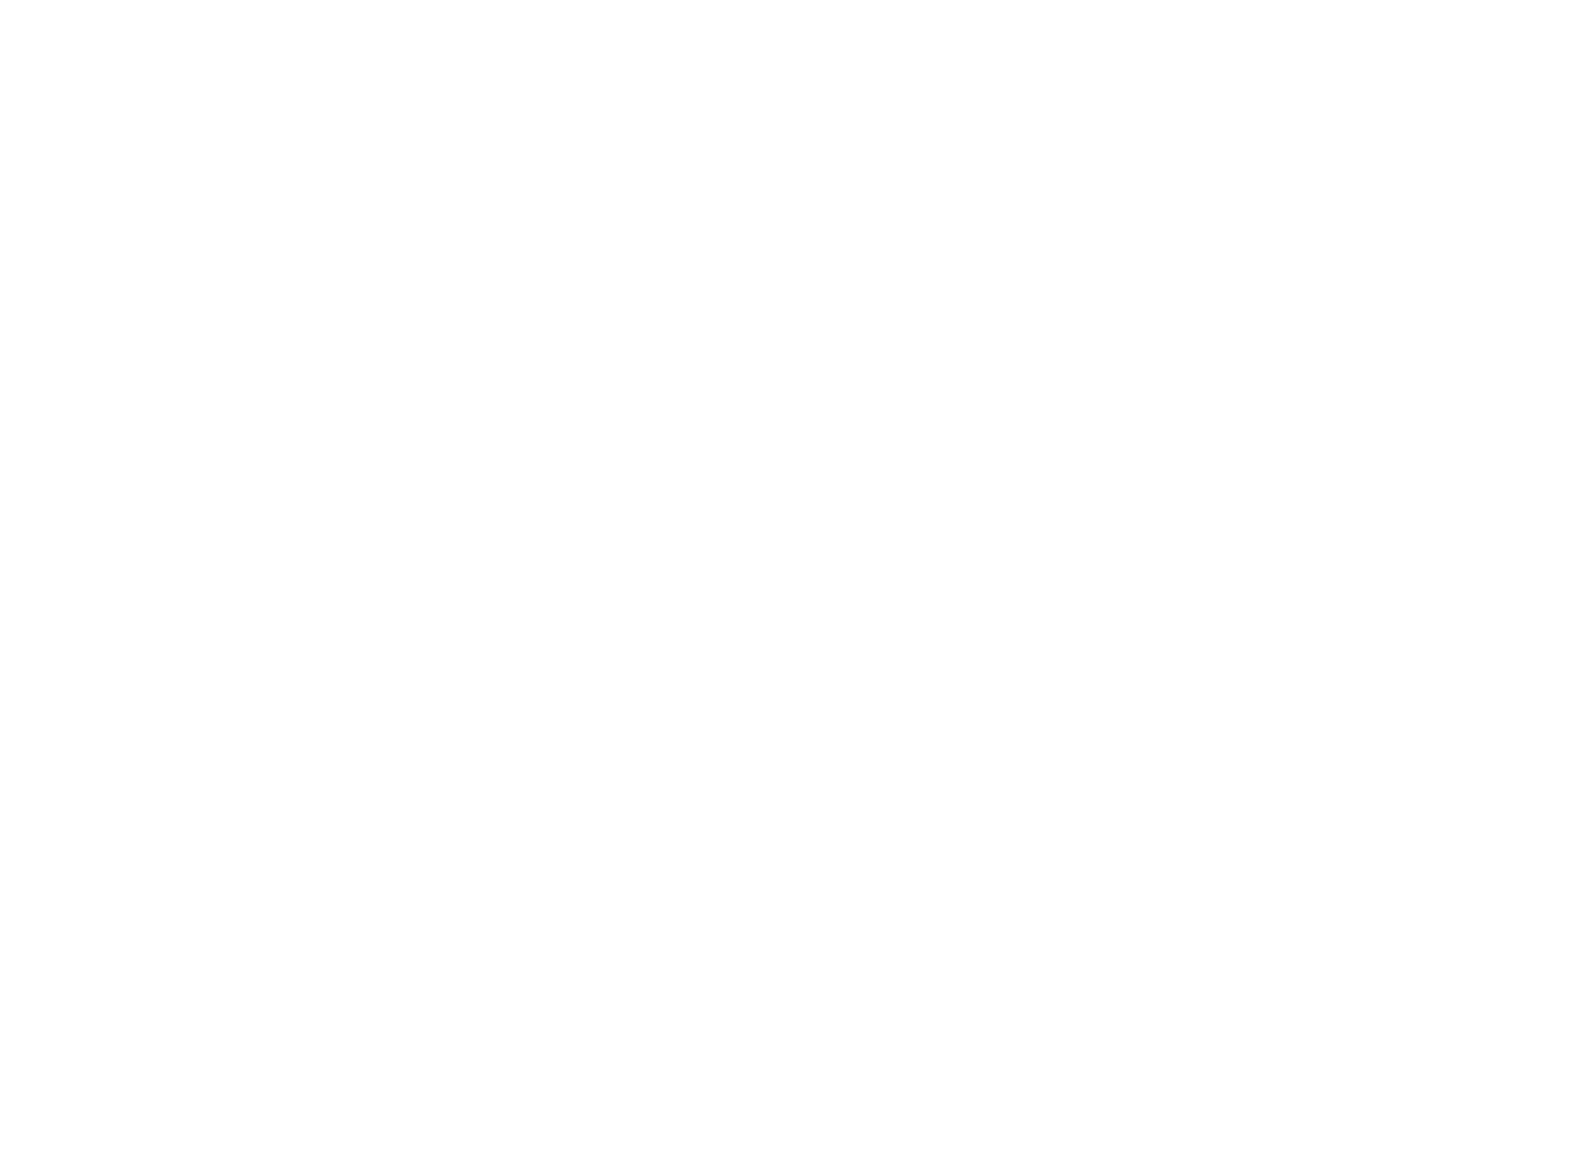

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

6.803420296260797

In [ ]:
model.coef_

array([-0.01567464, -0.00777936, -0.00564115, -0.0979713 , -0.00436275])

In [ ]:
reg_predict=model.predict(X)
tree_predict=tree_model.predict(X)

In [ ]:
print('Linear Regression R2 score: '+str(round(r2_score(y,reg_predict),2)))
print('Decision Tree R2 score: '+str(round(r2_score(y,tree_predict),2)))

Linear Regression R2 score: 0.55
Decision Tree R2 score: 0.66


In [ ]:
print('Linear Regression MAE score: '+str(round(mae(y,reg_predict),2)))
print('Decision Tree MAE score: '+str(round(mae(y,tree_predict),2)))

Linear Regression MAE score: 0.1
Decision Tree MAE score: 0.09


In [ ]:
print('Linear Regression RMSE score: '+str(round(mse(y,reg_predict,squared=False),2)))
print('Decision Tree RMSE score: '+str(round(mse(y,tree_predict,squared=False),2)))

Linear Regression RMSE score: 0.13
Decision Tree RMSE score: 0.11
